<a href="https://colab.research.google.com/github/Tiabet/MachinLearning/blob/master/Football_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('final_data.csv')

In [ ]:
data = df

In [ ]:
data.head(5)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,team_encoded
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,0.335463,9390,42,5,13,15000000,70000000,1,0,226
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,0.207055,1304,510,58,1,1500000,22000000,1,0,226
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.924658,292,697,84,4,600000,6000000,1,0,226
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,6408,175,22,9,50000000,50000000,2,0,226
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,5031,238,51,21,40000000,80000000,2,0,226


In [ ]:
data.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [ ]:
team_value_counts = data['team'].value_counts()
data['winger'].value_counts()

winger
0    7447
1    3307
Name: count, dtype: int64

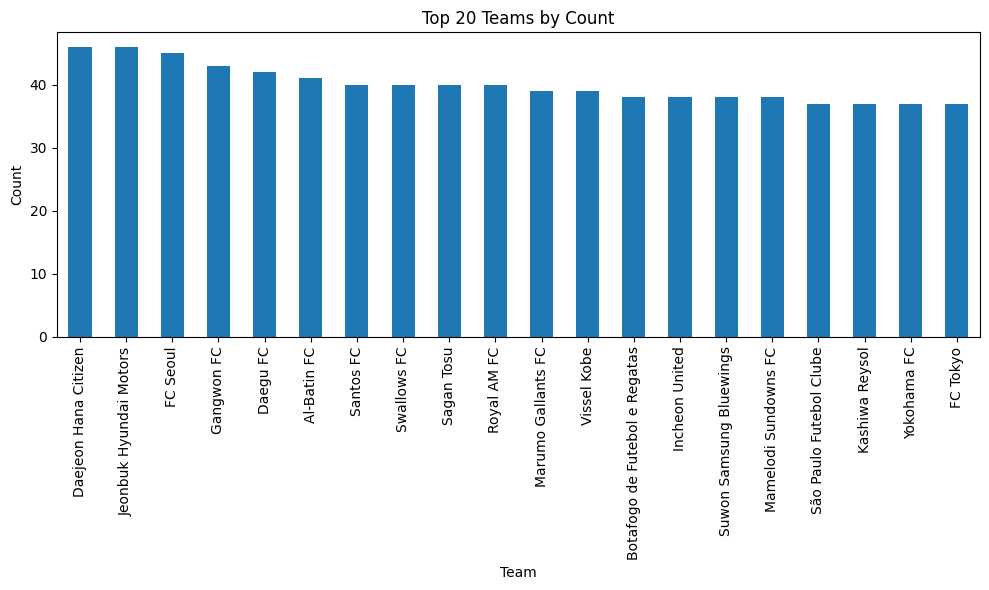

In [ ]:
import matplotlib.pyplot as plt
# Visualize the top 20 teams
top_n = 20
top_teams = team_value_counts.head(top_n)

plt.figure(figsize=(10, 6))
top_teams.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Top 20 Teams by Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['team_encoded'] = label_encoder.fit_transform(data['team'])

In [ ]:
pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
from flaml import AutoML

In [ ]:
X = data.drop(columns=['current_value'])
y = data['current_value']

In [ ]:
X = X.drop(columns = ['player', 'name', 'position','winger', 'team_encoded'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
automl = AutoML()

settings = {
    "time_budget": 60,
    "metric": 'r2',
    "n_splits": 3,
    "task": 'regression',
    "log_file_name": 'automl.log',
}

automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.logger: 06-08 08:49:06] {1680} INFO - task = regression
[flaml.automl.logger: 06-08 08:49:06] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 06-08 08:49:06] {1789} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 06-08 08:49:06] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 06-08 08:49:06] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-08 08:49:06] {2345} INFO - Estimated sufficient time budget=1329s. Estimated necessary time budget=9s.
[flaml.automl.logger: 06-08 08:49:06] {2392} INFO -  at 0.2s,	estimator lgbm's best error=0.6364,	best estimator lgbm's best error=0.6364
[flaml.automl.logger: 06-08 08:49:06] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-08 08:49:06] {2392} INFO -  at 0.4s,	estimator lgbm's best error=0.6364,	best estimator lgbm's best error=0.6364
[flaml.automl.logger: 06-08 08:49:06] {2219} INFO - i

In [ ]:
print(automl.best_estimator)
print(automl.best_config)
print(automl.best_loss)

lgbm
{'n_estimators': 150, 'num_leaves': 8, 'min_child_samples': 4, 'learning_rate': 0.1967016673936409, 'log_max_bin': 10, 'colsample_bytree': 0.8846955755228798, 'reg_alpha': 0.004577823970660193, 'reg_lambda': 3.581394041443909}
0.10850598813648604


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = automl.predict(X_test)

# Convert predictions and actual values to NumPy arrays
y_pred = np.array(y_pred)
y_test = np.array(y_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R² value
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

Mean Squared Error: 5632377207198.198
Root Mean Squared Error: 2373262.9873653273
R²: 0.9377188427851479


새로운 시도 #새로운 피처 추가

In [ ]:
data = df

In [ ]:
data['goal+assists']=data['goals']+data['assists']
data['Minutes per Game']=data['minutes played']/data['appearance']
data['warning'] = data['yellow cards'] + data['second yellow cards'] + data['red cards']

In [ ]:
data=data.drop(columns=['player','name','position','winger'])

In [ ]:
X = data.drop(columns=['current_value'])
y = data['current_value']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
automl = AutoML()

settings = {
    "time_budget": 60,
    'estimator_list': ['lgbm', 'rf', 'xgboost'],
    "metric": 'r2',
    'eval_method': 'cv',
    "n_splits": 3,
    "task": 'regression',
    "log_file_name": 'automl.log',
}

automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.logger: 06-08 09:24:56] {1680} INFO - task = regression
[flaml.automl.logger: 06-08 09:24:56] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 06-08 09:24:56] {1789} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 06-08 09:24:56] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost']
[flaml.automl.logger: 06-08 09:24:56] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-08 09:24:56] {2345} INFO - Estimated sufficient time budget=1602s. Estimated necessary time budget=2s.
[flaml.automl.logger: 06-08 09:24:56] {2392} INFO -  at 0.3s,	estimator lgbm's best error=0.6364,	best estimator lgbm's best error=0.6364
[flaml.automl.logger: 06-08 09:24:56] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-08 09:24:56] {2392} INFO -  at 0.4s,	estimator lgbm's best error=0.6364,	best estimator lgbm's best error=0.6364
[flaml.automl.logger: 06-08 09:24:56] {2219} INFO - iteration 2, current learner lgbm

In [ ]:
print(automl.best_estimator)
print(automl.best_config)
print(automl.best_loss)

lgbm
{'n_estimators': 520, 'num_leaves': 10, 'min_child_samples': 5, 'learning_rate': 0.05797983348762071, 'log_max_bin': 7, 'colsample_bytree': 0.8061977118794074, 'reg_alpha': 0.00988562433269002, 'reg_lambda': 0.0026301859082326477}
0.08718919187446317


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = automl.predict(X_test)

# Convert predictions and actual values to NumPy arrays
y_pred = np.array(y_pred)
y_test = np.array(y_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R² value
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

Mean Squared Error: 6567067095474.397
Root Mean Squared Error: 2562628.942214303
R²: 0.9273833191266001


스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data = df

In [ ]:
data=data.drop(columns=['player','name','position','winger'])

In [ ]:
data['goal+assists']=data['goals']+data['assists']
data['Minutes per Game']=data['minutes played']/data['appearance']
data['warning'] = data['yellow cards'] + data['second yellow cards'] + data['red cards']

In [ ]:
X = data.drop(columns=['current_value'])
y = data['current_value']

In [ ]:
# Reshape y and scale it
y = y.values.reshape(-1, 1)  # Convert to NumPy array and reshape
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y).flatten()  # Flatten back to a 1D array

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)


In [ ]:
automl = AutoML()

settings = {
    "time_budget": 120,
    'estimator_list': ['lgbm', 'rf', 'xgboost'],
    "metric": 'rmse',
    'eval_method': 'cv',
    "n_splits": 3,
    "task": 'regression',
    "log_file_name": 'automl.log',
}

automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.logger: 06-08 09:37:20] {1680} INFO - task = regression
[flaml.automl.logger: 06-08 09:37:20] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 06-08 09:37:20] {1789} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 06-08 09:37:20] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost']
[flaml.automl.logger: 06-08 09:37:20] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-08 09:37:21] {2345} INFO - Estimated sufficient time budget=9077s. Estimated necessary time budget=9s.
[flaml.automl.logger: 06-08 09:37:21] {2392} INFO -  at 1.0s,	estimator lgbm's best error=0.7883,	best estimator lgbm's best error=0.7883
[flaml.automl.logger: 06-08 09:37:21] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-08 09:37:21] {2392} INFO -  at 1.2s,	estimator lgbm's best error=0.7883,	best estimator lgbm's best error=0.7883
[flaml.automl.logger: 06-08 09:37:21] {2219} INFO - iteration 2, current learner lgbm

In [ ]:
print(automl.best_estimator)
print(automl.best_config)
print(automl.best_loss)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = automl.predict(X_test)

# Convert predictions and actual values to NumPy arrays
y_pred = np.array(y_pred)
y_test = np.array(y_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R² value
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')